In [2]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 6.9 MB/s 


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
analyzer = SentimentIntensityAnalyzer()

In [5]:
!python3 -m pip install nltk

In [6]:
import pandas as pd

In [7]:
from google.colab import drive

drive.mount('/content/drive')

with open('/content/drive/My Drive/ECE 539/ECE 539 Project/reddit_wsb.csv', 'r') as f: 
  df= pd.read_csv(f)
# r_data = r_data[pd.to_datetime(r_data.timestamp).dt.year>=2021]

Mounted at /content/drive


In [8]:
df.head

<bound method NDFrame.head of                                                    title  score      id  \
0      $CBAT $SUNW $SPI $OXBR Y'all are missing the p...      4  j1fmmo   
1      An autists journey. $150 to $68k in one month....     50  l6h58v   
2           You all have made Melvin live up to its name     70  l6h59b   
3      I got in late on GME but I believe in the caus...     75  l6h5a2   
4      Highest SI % of Float End of Business Jan 27th...     26  l6h5am   
...                                                  ...    ...     ...   
53167                             RKT and the week ahead     58  p58soc   
53168  Verizon ($VZ) – Boomer’s Dividends Are Degener...     13  p599nb   
53169                             $HIPO - HIPPO HOLDINGS     13  p59a57   
53170                Watching your porfolio after a YOLO    305  p59txq   
53171          The CLOV clinician letter is worth a read     59  p5ahrj   

                                                     url  comms_num  

In [9]:
df.drop(['id', 'url','created'], axis=1, inplace=True)

In [10]:
!pip3 install clean-text

     |████████████████████████████████| 53 kB 1.3 MB/s 
     |████████████████████████████████| 175 kB 22.7 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=1d1672406d6ec691d9dba8b4ff3c598fa66b5eb0526ef2008b709ea9189b3565
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [11]:
from cleantext import clean

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [12]:
body=df['body']
title=df['title']
body.isna().sum()
df.dropna(subset=['body'],inplace=True)
df.reset_index(drop=True,inplace=True)

df['title'] = df['title'].str.lower()
df['body'] = df['body'].str.lower()
df
body=df['body']
body

0        $cbat is going to be a great play further yet:...
1        you guys are amazing. thank you for sending gm...
2        will update daily at market close\n\ntop 5 sec...
3        i can't see how to talk to to any anti bot mea...
4        hey retards what the hell is going on with amc...
                               ...                        
24718    ok degenerates – i’d like to introduce you to ...
24719    rkts beginning to show signs of life again.\n\...
24720    my wife decided to go to her boyfriend’s house...
24721     $hipo - hippo holdings\n\ndegenerates! let me...
24722    i am a doctor trained in internal medicine and...
Name: body, Length: 24723, dtype: object

In [13]:
body_data = body.copy()
print(clean(body_data[2],lower=True))

will update daily at market close
top 5 securities with si % of float end of business jan 27th:
1.) gme - 139.73%
2.) spdr s&p retail etf - 133.17%
3.) sprd s&p biotech etf - 101.44%
4.) spdr oil gas exp prod etf - 88.51%
5.) bed bath & beyond - 67.36%


In [14]:
clean(body_data,no_urls=True,fix_unicode=True,to_ascii=True,no_punct=' ',replace_with_url=' ',replace_with_punct=' ')
print(body_data[2])



will update daily at market close

top 5 securities with si % of float end of business jan 27th:

1.) gme - 139.73%

2.) spdr s&p retail etf - 133.17%

3.) sprd s&p biotech etf - 101.44%

4.) spdr oil gas exp prod etf - 88.51%

5.) bed bath & beyond - 67.36%


In [15]:
import re
def clean_text_date(text):


    # Replacing Handlers with Empty String
    text = re.sub('@[^\s]+','',text)

    # Replacing URLs with Empty String
    text = re.sub(r"http\S+", "",text)

    # Remove all the special characters
    text = ' '.join(re.findall(r'\w+', text))

    # Replacing Single Characters with Empty String
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Removing Extra Spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text

    
# Text Preprocessing
#reddit_title = reddit_title.apply(lambda x : clean_text_date(x))
body1=body.apply(lambda x : clean_text_date(x))
body1[0]

'cbat is going to be great play further yet their new tabless batteries hold further implications than just for ev companies like tsla the chinese government have been looking for alternative sources of energy storage and will refuse to use foreign businesses for the case of infrastructure development cbat already existing patents have their primary implications in the ev es sector but the tabless battery announcement mainly points to grid integrated energy storage as an immediately profitable direction for the company position long cbat for 276000 shares at 77 cost basis up 418k'

In [16]:
import nltk.corpus 
nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stopwords= stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
body1

0        cbat is going to be great play further yet the...
1        you guys are amazing thank you for sending gme...
2        will update daily at market close top 5 securi...
3        i can see how to talk to to any anti bot measu...
4        hey retards what the hell is going on with amc...
                               ...                        
24718    ok degenerates d like to introduce you to comp...
24719    rkts beginning to show signs of life again fir...
24720    my wife decided to go to her boyfriend house t...
24721    hipo hippo holdings degenerates let me introdu...
24722    i am doctor trained in internal medicine and g...
Name: body, Length: 24723, dtype: object

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
for i in range(0,24722):
    example_sentence=body1[i]
    words=word_tokenize(example_sentence)
    body1[i]=[w for w in words if not w in stopwords]

In [22]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [23]:
body1

0        [cbat, going, great, play, yet, new, tabless, ...
1        [guys, amazing, thank, sending, gme, moon, kno...
2        [update, daily, market, close, top, 5, securit...
3        [see, talk, anti, bot, measure, admin, contact...
4        [hey, retards, hell, going, amc, hours, trying...
                               ...                        
24718    [ok, degenerates, like, introduce, company, no...
24719    [rkts, beginning, show, signs, life, first, er...
24720    [wife, decided, go, boyfriend, house, tonight,...
24721    [hipo, hippo, holdings, degenerates, let, intr...
24722    i am doctor trained in internal medicine and g...
Name: body, Length: 24723, dtype: object

In [24]:
df['body']=body1

In [25]:
title=df['title']
title1=title.apply(lambda x : clean_text_date(x))
title1

0             cbat sunw spi oxbr all are missing the point
1        i got in late on gme but believe in the cause ...
2        highest si of float end of business jan 27th a...
3                                       discord still down
4                                what are you doing to amc
                               ...                        
24718                              zeta global holdings dd
24719                               rkt and the week ahead
24720    verizon vz boomer dividends are degenerate ten...
24721                                  hipo hippo holdings
24722              the clov clinician letter is worth read
Name: title, Length: 24723, dtype: object

In [26]:
for i in range(0,24722):
    example_sentence=title[i]
    words=word_tokenize(example_sentence)
    title1[i]=[w for w in words if not w in stopwords]

In [27]:
df['title']=title1

In [28]:
def create_text_blob(df, text_column):
    blob_text=[]
    for i, content in df[text_column].items():
        for i in str(content).split():
            blob_text.append(i.lower())
    return blob_text

blob_text = create_text_blob(df, 'body')
print(blob_text[0:100])

["['cbat',", "'going',", "'great',", "'play',", "'yet',", "'new',", "'tabless',", "'batteries',", "'hold',", "'implications',", "'ev',", "'companies',", "'like',", "'tsla',", "'chinese',", "'government',", "'looking',", "'alternative',", "'sources',", "'energy',", "'storage',", "'refuse',", "'use',", "'foreign',", "'businesses',", "'case',", "'infrastructure',", "'development',", "'cbat',", "'already',", "'existing',", "'patents',", "'primary',", "'implications',", "'ev',", "'es',", "'sector',", "'tabless',", "'battery',", "'announcement',", "'mainly',", "'points',", "'grid',", "'integrated',", "'energy',", "'storage',", "'immediately',", "'profitable',", "'direction',", "'company',", "'position',", "'long',", "'cbat',", "'276000',", "'shares',", "'77',", "'cost',", "'basis',", "'418k']", "['guys',", "'amazing',", "'thank',", "'sending',", "'gme',", "'moon',", "'know',", "'going',", "'lose',", "'money',", "'hold',", "'line',", "'end',", "'let',", "'send',", "'clear',", "'message',", "'

In [29]:
def create_text_blob(df, text_column):
    blob_text=[]
    for i, content in df[text_column].items():
        for i in str(content).split():
            blob_text.append(i.lower())
    return blob_text

blob_text2 = create_text_blob(df, 'title')
print(blob_text2[0:100])

["['$',", "'cbat',", "'$',", "'sunw',", "'$',", "'spi',", "'$',", "'oxbr',", '"y\'all",', "'missing',", "'point',", "'.']", "['got',", "'late',", "'gme',", "'believe',", "'cause',", "'willing',", "'lose',", "'.']", "['highest',", "'si',", "'%',", "'float',", "'end',", "'business',", "'jan',", "'27th',", "'according',", "'s3',", "'partners']", "['discord',", "'still']", "['amc',", "'?']", "['buy',", "'stock',", "'?',", "'?',", "'?',", "'?',", "'!',", "'!',", "'!']", "['buy',", "'games',", "'gamestop',", "',',", "'donate',", "'charity',", "'(',", "'goodwill',", "')']", "['become',", "'force',", "'good',", "'power',", "'?']", "['get',", "'fucked',", "'investing',", "'nakd']", "['late',", "'buy',", "'gamestop',", "'shares',", "'?']", "['pending',", "'transfer',", "'rh',", "'question']", "['good',", "'job',", "'guys']", "['remember',", "'spend',", "'loot',", "'gamestop',", "'!']", "['deluge',", "'spam',", "'posts',", "'stocks',", "'like',", "'nokia',", "'amc',", "',',", "'brokers',", "'``',

In [30]:
list=[]
for i in range(0,24722):
    list.append(df['body'][i])
print(list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
true=[]
for i in range(0,24723):
    if'gme' in body[i]:
        true.append(1)
    else:
        true.append(0)



In [32]:
true2=[]
for i in range(0,24723):
    if 'amc' in body[i]:
        true2.append(1)
    else:
        true2.append(0)

In [33]:
df['gme']=true
df['amc']=true2

In [34]:
df

,title,score,comms_num,body,timestamp,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,gme,amc
0,"[$, cbat, $, sunw, $, spi, $, oxbr, y'all, mis...",4,11,"[cbat, going, great, play, yet, new, tabless, ...",9/29/20 3:46,NaN,NaN,NaN,NaN,0,0
1,"[got, late, gme, believe, cause, willing, lose...",75,14,"[guys, amazing, thank, sending, gme, moon, kno...",1/28/21 9:08,NaN,NaN,NaN,NaN,1,1
2,"[highest, si, %, float, end, business, jan, 27...",26,22,"[update, daily, market, close, top, 5, securit...",1/28/21 9:08,NaN,NaN,NaN,NaN,1,0
3,"[discord, still]",0,6,"[see, talk, anti, bot, measure, admin, contact...",1/28/21 9:08,NaN,NaN,NaN,NaN,0,0
4,"[amc, ?]",67,55,"[hey, retards, hell, going, amc, hours, trying...",1/28/21 9:08,NaN,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
24718,"[zeta, global, holdings…, dd]",0,11,"[ok, degenerates, like, introduce, company, no...",8/16/21 6:57,NaN,NaN,NaN,NaN,0,0
24719,"[rkt, week, ahead]",58,29,"[rkts, beginning, show, signs, life, first, er...",8/16/21 7:17,NaN,NaN,NaN,NaN,0,0
24720,"[verizon, (, $, vz, ), –, boomer, ’, dividends...",13,17,"[wife, decided, go, boyfriend, house, tonight,...",8/16/21 7:51,NaN,NaN,NaN,NaN,0,0
24721,"[$, hipo, -, hippo, holdings]",13,24,"[hipo, hippo, holdings, degenerates, let, intr...",8/16/21 7:52,NaN,NaN,NaN,NaN,0,0


In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [36]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [37]:
def get_sentiment(sia, text):
    return sia.polarity_scores(text)["compound"]
        

sia = SentimentIntensityAnalyzer()    


reddit_title_df = df["title"].to_frame(name='Title')
reddit_title_df['title_as_string'] = reddit_title_df['Title'].str.join(" ")
reddit_title_df['Sentiment'] = reddit_title_df['title_as_string'].apply(lambda x : get_sentiment(sia, x))

reddit_body_df = df["body"].to_frame(name='Body')
reddit_body_df['body_as_string'] = reddit_body_df['Body'].str.join(" ")
reddit_body_df['Sentiment'] = reddit_body_df['body_as_string'].apply(lambda x : get_sentiment(sia, x))

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

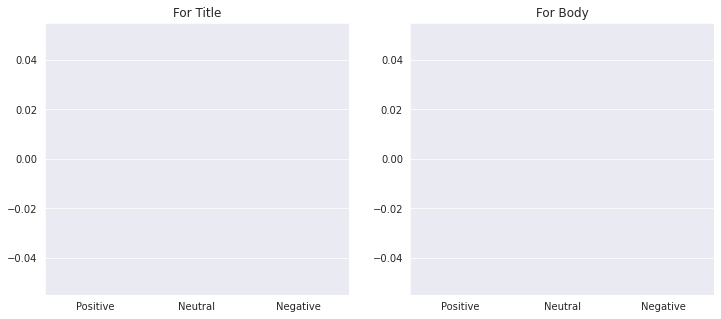

In [39]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,5))

order = ['Positive', 'Neutral', 'Negative']

xs = reddit_title_df['Sentiment'].value_counts().index
ys = reddit_title_df['Sentiment'].value_counts().values
sns.barplot(x=xs, y=ys, order=order, ax=axis1)

xs = reddit_body_df['Sentiment'].value_counts().index
ys = reddit_body_df['Sentiment'].value_counts().values
sns.barplot(x=xs, y=ys, order=order, ax=axis2)

axis1.set_title("For Title")
axis2.set_title("For Body")

plt.show()

In [40]:
df["title_sentiment"] = reddit_title_df["Sentiment"]
df["body_sentiment"] = reddit_body_df["Sentiment"]
df['Date'] = pd.to_datetime(df['timestamp']).dt.date
df['Time'] = pd.to_datetime(df['timestamp']).dt.time

In [41]:
gme_df = df[df["gme"] == 1]
amc_df = df[df["amc"] == 1]

gme_df.tail()
gme_df.head()

,title,score,comms_num,body,timestamp,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,gme,amc,title_sentiment,body_sentiment,Date,Time
1,"[got, late, gme, believe, cause, willing, lose...",75,14,"[guys, amazing, thank, sending, gme, moon, kno...",1/28/21 9:08,NaN,NaN,NaN,NaN,1,1,-0.4019,0.7351,2021-01-28,09:08:00
2,"[highest, si, %, float, end, business, jan, 27...",26,22,"[update, daily, market, close, top, 5, securit...",1/28/21 9:08,NaN,NaN,NaN,NaN,1,0,0.0000,0.4588,2021-01-28,09:08:00
7,"[become, force, good, power, ?]",36,12,"[hey, gang, long, time, user, recently, got, b...",1/28/21 9:08,NaN,NaN,NaN,NaN,1,0,0.4404,0.9902,2021-01-28,09:08:00
10,"[pending, transfer, rh, question]",0,12,"[upgrading, rh, gold, make, current, pending, ...",1/28/21 9:09,NaN,NaN,NaN,NaN,1,0,0.0000,0.0000,2021-01-28,09:09:00
13,"[deluge, spam, posts, stocks, like, nokia, amc...",43,20,"[might, able, read, letters, numbers, easy, x2...",1/28/21 9:10,NaN,NaN,NaN,NaN,1,1,-0.6848,0.8910,2021-01-28,09:10:00


In [42]:
gme_df["Date"].min(), gme_df["Date"].max()

(datetime.date(2021, 1, 28), datetime.date(2021, 8, 14))

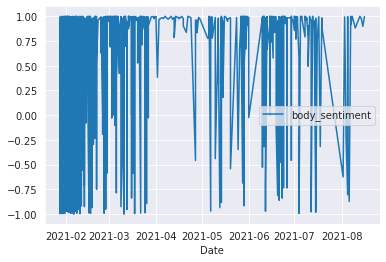

In [43]:
amc_df.plot(x = "Date", y = "body_sentiment")

In [44]:
df.to_csv('df.csv', encoding='utf-8')
